# Executive summary

The purpose of this notebook is analyse and prepare FIFA data in order to use it in Dash for Python.

We will use the K-NN algorithm to find a player that matches the skills and stats of another one chosen by the user.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [3]:
ruta = 'dataFIFA.csv'

df = pd.read_csv(ruta)

In order to perform an analysis based on stats, we need to define and group all the positions in the dataset in only 4 categories:
- GoalKeeper
- Center
- Defense
- Forward

In [72]:
keeper = ['GK']
center = ['CAM', 'CDM', 'RM', 'RB', 'LB', 'LM', 'CM' ,'RCM', 'LCM', 'LDM', 'LAM', 'RAM', 'RDM']
forward = ['RF', 'ST', 'LW', 'LF', 'CF', 'RS', 'LS']
defense = ['CB', 'RWB', 'LWB', 'RW', 'RCB', 'LCB']

In [73]:
def cambiarNombre(df):
    if df in keeper:
        return 'GoalKeeper'
    elif df in center:
        return 'Center'
    elif df in forward:
        return 'Forward'
    elif df in defense:
        return 'Defense'
    else:
        return 'No position'

In [74]:
df['Position'] = df['Position'].map(lambda x: cambiarNombre(x))

Now that we have our four positions grouped is time to perform a Lasso Analysis to determine which stat has more influence in the categories.

In [75]:
df.Position.unique()

array(['Forward', 'GoalKeeper', 'Center', 'Defense', 'No position'],
      dtype=object)

We are going to choose attributes and skills of each player.

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [77]:
df.isna().any()

ID                          False
Name                        False
Age                         False
Photo                       False
Nationality                 False
Flag                        False
Overall                     False
Potential                   False
Club                         True
Club Logo                   False
Value                       False
Wage                        False
Special                     False
Preferred Foot               True
International Reputation     True
Weak Foot                    True
Skill Moves                  True
Work Rate                    True
Body Type                    True
Real Face                    True
Position                    False
Jersey Number                True
Joined                       True
Loaned From                  True
Contract Valid Until         True
Height                       True
Weight                       True
LS                           True
ST                           True
RS            

In [3]:
attributes = ['Name','Nationality','Club','Age','Position','Overall','Potential','Preferred Foot','Value']

abilities = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys',
             'Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
             'Acceleration','SprintSpeed','Agility','Reactions','Balance',
             'ShotPower','Jumping','Stamina','Strength','LongShots',
             'Aggression','Interceptions','Positioning','Vision','Penalties',
             'Composure','Marking','StandingTackle','SlidingTackle']

In [9]:
vec_length = np.sqrt(np.square(df[abilities]).sum(axis=1))
print(df[abilities].shape)

(18207, 29)


In [10]:
mat_abt = df[abilities].values.reshape((18207,29))

for i in np.arange(18207):
        mat_abt[i] = mat_abt[i,:]/vec_length[i]
        
df_norm = pd.DataFrame(mat_abt, columns=abilities)

In [137]:
names = df['Name']
names = pd.DataFrame(names)

In [138]:
overall = df['Overall']
overall = pd.DataFrame(overall)

In [139]:
potential = df['Potential']
potential = pd.DataFrame(potential)

In [124]:
df_norm['ipd'] = df_norm.dot(df_norm.loc[0])

TypeError: can't multiply sequence by non-int of type 'str'

In [125]:
dfComplete = names.join(df_norm)

ValueError: columns overlap but no suffix specified: Index(['Name'], dtype='object')

In [126]:
dfComplete = dfComplete.join(overall)

ValueError: columns overlap but no suffix specified: Index(['Overall'], dtype='object')

In [127]:
dfComplete = dfComplete.join(potential)

ValueError: columns overlap but no suffix specified: Index(['Potential'], dtype='object')

In [18]:
dfComplete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 33 columns):
Name               18207 non-null object
Crossing           18159 non-null float64
Finishing          18159 non-null float64
HeadingAccuracy    18159 non-null float64
ShortPassing       18159 non-null float64
Volleys            18159 non-null float64
Dribbling          18159 non-null float64
Curve              18159 non-null float64
FKAccuracy         18159 non-null float64
LongPassing        18159 non-null float64
BallControl        18159 non-null float64
Acceleration       18159 non-null float64
SprintSpeed        18159 non-null float64
Agility            18159 non-null float64
Reactions          18159 non-null float64
Balance            18159 non-null float64
ShotPower          18159 non-null float64
Jumping            18159 non-null float64
Stamina            18159 non-null float64
Strength           18159 non-null float64
LongShots          18159 non-null float64
Aggression

In [19]:
filtro = 'T. Lemar'
df[df.Name == filtro].Age

163    22
Name: Age, dtype: int64

In [20]:
df_norm[attributes] = df[attributes]
substitutes = dfComplete[(dfComplete.ipd.values >= dfComplete[dfComplete.Name == filtro].ipd.values ) \
                         & (dfComplete.Overall.values >= dfComplete[dfComplete.Name == filtro].Overall.values) & \
                         (dfComplete.Potential.values >= dfComplete[dfComplete.Name == filtro].Potential.values)]
substitutes

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  


,Name,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,ipd,Overall,Potential
0,L. Messi,0.193033,0.218311,0.160860,0.206821,0.197629,0.222907,0.213715,0.216013,0.199927,...,0.216013,0.216013,0.172351,0.220609,0.075834,0.064344,0.059748,1.000000,94,94
1,Cristiano Ronaldo,0.192485,0.215400,0.203942,0.185610,0.199359,0.201651,0.185610,0.174153,0.176445,...,0.217691,0.187902,0.194776,0.217691,0.064162,0.071036,0.052704,0.989954,94,94
2,Neymar Jr,0.187793,0.206810,0.147382,0.199679,0.199679,0.228204,0.209187,0.206810,0.185416,...,0.211564,0.206810,0.192547,0.223450,0.064182,0.057051,0.078445,0.996760,92,93
4,K. De Bruyne,0.214090,0.188767,0.126612,0.211788,0.188767,0.197975,0.195673,0.191069,0.209486,...,0.200277,0.216392,0.181861,0.202580,0.156539,0.133518,0.117404,0.980351,91,92
5,E. Hazard,0.192141,0.199257,0.144699,0.211118,0.189769,0.225350,0.196885,0.187396,0.196885,...,0.206373,0.211118,0.204001,0.215862,0.080652,0.064047,0.052186,0.995581,91,91
7,L. Suárez,0.178928,0.216107,0.178928,0.190546,0.204489,0.202165,0.199841,0.195194,0.148719,...,0.213784,0.195194,0.197517,0.197517,0.144072,0.104568,0.088302,0.984501,91,91
10,R. Lewandowski,0.148342,0.217728,0.203372,0.198587,0.212942,0.203372,0.184231,0.205765,0.155520,...,0.217728,0.184231,0.210550,0.205765,0.081349,0.100490,0.045460,0.985213,90,90
13,David Silva,0.204337,0.184876,0.131359,0.226230,0.199471,0.216500,0.199471,0.187309,0.211634,...,0.216500,0.223797,0.182443,0.226230,0.143522,0.128927,0.070545,0.987812,90,90
15,P. Dybala,0.196823,0.201624,0.163219,0.208825,0.211225,0.220826,0.211225,0.211225,0.180021,...,0.201624,0.208825,0.206424,0.201624,0.055207,0.048006,0.048006,0.996806,89,94
16,H. Kane,0.179707,0.225233,0.203668,0.191687,0.201272,0.191687,0.186895,0.162934,0.196479,...,0.222836,0.191687,0.215648,0.213252,0.134181,0.086259,0.091051,0.982285,89,91


In [255]:
substitutes = substitutes.sort_values(by=['Potential'], ascending=False)
substitutes = substitutes.join()
substitutes.reset_index(drop=True)

,Name,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,ipd,Overall,Potential
0,K. Mbappé,0.186402,0.213031,0.186402,0.198506,0.188823,0.217872,0.186402,0.152511,0.176719,...,0.213031,0.198506,0.169456,0.208189,0.082307,0.082307,0.077466,0.991531,88,95
1,Cristiano Ronaldo,0.192485,0.215400,0.203942,0.185610,0.199359,0.201651,0.185610,0.174153,0.176445,...,0.217691,0.187902,0.194776,0.217691,0.064162,0.071036,0.052704,0.989954,94,94
2,P. Dybala,0.196823,0.201624,0.163219,0.208825,0.211225,0.220826,0.211225,0.211225,0.180021,...,0.201624,0.208825,0.206424,0.201624,0.055207,0.048006,0.048006,0.996806,89,94
3,L. Messi,0.193033,0.218311,0.160860,0.206821,0.197629,0.222907,0.213715,0.216013,0.199927,...,0.216013,0.216013,0.172351,0.220609,0.075834,0.064344,0.059748,1.000000,94,94
4,Neymar Jr,0.187793,0.206810,0.147382,0.199679,0.199679,0.228204,0.209187,0.206810,0.185416,...,0.211564,0.206810,0.192547,0.223450,0.064182,0.057051,0.078445,0.996760,92,93
5,Gabriel Jesus,0.164996,0.209995,0.184996,0.189996,0.179996,0.214995,0.189996,0.134997,0.164996,...,0.219995,0.192496,0.194996,0.204996,0.132497,0.057499,0.047499,0.986128,83,92
6,O. Dembélé,0.201171,0.201171,0.110902,0.201171,0.196012,0.232120,0.201171,0.165063,0.180538,...,0.203750,0.216645,0.193433,0.193433,0.108323,0.077373,0.085111,0.991248,83,92
7,L. Sané,0.205400,0.200451,0.178179,0.195501,0.210350,0.217774,0.202926,0.168280,0.158381,...,0.207875,0.202926,0.175704,0.193027,0.089089,0.079190,0.086615,0.991934,86,92
8,Marco Asensio,0.206800,0.206800,0.126097,0.209322,0.199234,0.216888,0.209322,0.191668,0.206800,...,0.206800,0.211844,0.156361,0.209322,0.100878,0.105922,0.098356,0.993376,85,92
9,K. De Bruyne,0.214090,0.188767,0.126612,0.211788,0.188767,0.197975,0.195673,0.191069,0.209486,...,0.200277,0.216392,0.181861,0.202580,0.156539,0.133518,0.117404,0.980351,91,92


In [84]:
#df.sort_index(inplace=True)
#dfComplete.sort_index(inplace=True)

#df.sort_index().sort_index(axis=1, inplace=True)
#dfComplete.sort_index().sort_index(axis=1, inplace=True)

df = df.reset_index(drop=True)
#dfComplete = dfComplete.reset_index(drop=True)

In [223]:
print(df.index)

RangeIndex(start=0, stop=18207, step=1)


In [85]:
#dfComplete.ipd >= dfComplete[dfComplete.Name == filtro].ipd
#dfComplete.ipd >= dfComplete.ipd
#dfComplete.ipd >= dfComplete.loc[dfComplete.Name == 'L. Messi'].ipd
#dfComplete.iloc['ipd'] >= dfComplete.iloc[dfComplete.Name == 'L. Messi'].ipd
df.Overall.values >= df[df.Name == 'L. Messi'].Overall.values

array([ True,  True, False, ..., False, False, False])

In [10]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16, 8))
    plt.scatter(
        df[feature],
        df[target],
        c = 'black'
    )
    plt.xlabel('Importancia de variable en position')
    plt.show()

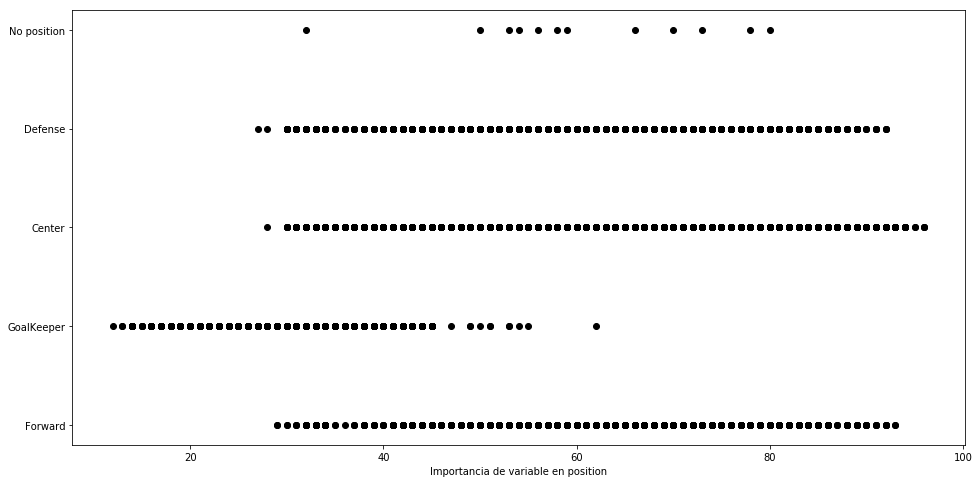

In [15]:
scatter_plot(['Stamina'], 'Position')

We need to perform some changes in some variables in order to have them as float

In [298]:
df['Wage'] = df['Wage'].str.replace('€', '')
df['Wage'] = df['Wage'].str.replace('K', '')

In [299]:
df['Release Clause'] = df['Release Clause'].str.replace('€', '')
df['Release Clause'] = df['Release Clause'].str.replace('K', '')
df['Release Clause'] = df['Release Clause'].str.replace('M', '')

In [41]:
df['Release Clause'] = df['Release Clause'].astype('float')
df['Wage'] = df['Wage'].astype('float')

# Lasso Regression

In [4]:
model_variables = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM',
                   'RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB',
                   'Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling', 
                   'Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility',
                   'Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression',
                   'Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle',
                   'SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes','Release Clause']
model_variables_test = ['Overall', 'Wage']

In [33]:
abilities = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys',
             'Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
             'Acceleration','SprintSpeed','Agility','Reactions','Balance',
             'ShotPower','Jumping','Stamina','Strength','LongShots',
             'Aggression','Interceptions','Positioning','Vision','Penalties',
             'Composure','Marking','StandingTackle','SlidingTackle']

abilities_goalKeeper = ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

In [5]:
dictionary = {"Position": {"GoalKeeper": 0, "Defense": 1, 'Center' : 2, 'Forward' : 3, 'No position' : 4}}
dic_dos = {'Position': {'LS' : 0,'ST' : 1,'RS' : 2,'LW' : 3,'LF' : 4,'CF' : 5,'RF' : 6,'RW': 7,'LAM': 8,'CAM':9,'RAM':10,'LM':11,
                        'LCM' : 12,'CM': 13,'RCM' : 14,'RM': 15,'LWB':16,'LDM':17,'CDM':18,'RDM':19,'RWB':20,
                        'LB' : 21,'LCB' :22,'CB' : 23,'RCB' : 24,'RB' : 25, 'GK' : 26}}

In [6]:
df.replace(dic_dos, inplace=True)

In [44]:
df.Position.fillna(27, inplace=True)
df['Position'].astype(int).head()

0     6
1     1
2     3
3    26
4    14
Name: Position, dtype: int32

In [8]:
newX = df[model_variables]
newY = df['Position']

newX.fillna(0, inplace=True)

E:\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [359]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print (len(X_test), len(y_test))

5463 5463


In [360]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [369]:
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.7694446086765251
linear regression test score: 0.7587832869007095
ridge regression train score low alpha: 0.7694446410778257
ridge regression test score low alpha: 0.7587830751122193
ridge regression train score high alpha: 0.7694444563634703
ridge regression test score high alpha: 0.7587922756508296


In [34]:
X = df[model_variables_test]
y = df.Position

X.fillna(0, inplace=True)

E:\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [35]:
n_neighbors = 6
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='distance')

In [51]:
#Overall, Wage
misVar = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM',
                   'RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB', 'GK']

overallMessi = df[df.Name == 'C. Jopia'].Overall.iloc[0]
wageMessi = df[df.Name == 'C. Jopia'].Wage.iloc[0]

#dataClass = clf.predict([[55,96]])
dataClass = clf.predict([[overallMessi, wageMessi]])
posicion = 0

for i in range(1, 27):
    if dataClass == i:
        posicion = misVar[i]

posicion

'GK'

In [15]:
overallMessi = df[df.Name == 'C. Jopia'].Overall

In [12]:
int(dataClass[0])

6

In [23]:
filtro = df.Wage < df[df.Name == 'L. Messi'].Wage.iloc[0] + 50
filtro2 = df.Position == dataClass[0]

df[(filtro2 & filtro)]['Name'].iloc[0:5]

3            De Gea
9          J. Oblak
18    M. ter Stegen
19      T. Courtois
22         M. Neuer
Name: Name, dtype: object

In [31]:
filtro = df[df.Name == 'L. Messi'].Wage.iloc[0]
    
if filtro > 280:
    filtro = df[df.Name == 'L. Messi'].Wage.iloc[0] + 50
elif (filtro > 200):
    filtro = df[df.Name == 'L. Messi'].Wage.iloc[0] + 25
elif (filtro > 100):
    filtro = df[df.Name == 'L. Messi'].Wage.iloc[0] + 15
        
filtro

615

In [45]:
condition = df[df.Name == 'De Gea'].Wage.iloc[0]
filtro = df.Wage <= condition
filtro2 = df.Position == dataClass[0]
na_me = df[(filtro & filtro2)]['Name'].iloc[0:5]
newDf_names = pd.DataFrame({'Name' : na_me})
df[abilities_goalKeeper][df.Name == newDf_names.Name.iloc[0]]

,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
3,90.0,85.0,87.0,88.0,94.0


In [50]:
First = df[abilities][df.Name == newDf_names.Name.iloc[0]]
Second = df[abilities][df.Name == newDf_names.Name.iloc[1]]
Third = df[abilities][df.Name == newDf_names.Name.iloc[2]]
Fourth = df[abilities][df.Name == newDf_names.Name.iloc[3]]
Five = df[abilities][df.Name == newDf_names.Name.iloc[4]]
    
if (dataClass[0] == 26):
    First = df[abilities_goalKeeper][df.Name == newDf_names.Name.iloc[0]]
    Second = df[abilities_goalKeeper][df.Name == newDf_names.Name.iloc[1]]
    Third = df[abilities_goalKeeper][df.Name == newDf_names.Name.iloc[2]]
    Fourth = df[abilities_goalKeeper][df.Name == newDf_names.Name.iloc[3]]
    Five = df[abilities_goalKeeper][df.Name == newDf_names.Name.iloc[4]]

graph = First.append([Second, Third, Fourth, Five])
#Radar Chart
temp = 0
#Just in case we have a goalkeeper
if (dataClass[0] == 26):
    temp = graph.values.reshape((5, 5))
else:
    temp= graph.values.reshape((5, 29))

tmp = 0
if (dataClass[0] == 26):
    tmp = pd.DataFrame(temp, columns = abilities_goalKeeper)
else:
    tmp = pd.DataFrame(temp, columns = abilities)

Attributes =list(tmp)
AttNo = len(Attributes)

In [38]:
df[abilities_goalKeeper].head()

,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,6.0,11.0,15.0,14.0,8.0
1,7.0,11.0,15.0,14.0,11.0
2,9.0,9.0,15.0,15.0,11.0
3,90.0,85.0,87.0,88.0,94.0
4,15.0,13.0,5.0,10.0,13.0


In [30]:
df[df.Name == 'L. Messi'].Wage.iloc[0]

565

In [15]:
df[df.Name == 'L. Messi'].Wage.iloc[0]

565

In [14]:
hola = df[df.Name == 'Ronaldo Cabrais'].Overall.iloc[0]
hola

83

In [225]:
df.columns[[1, 6, 7, 8, 12]][1:5]

Index(['Overall', 'Potential', 'Club', 'Special'], dtype='object')

In [235]:
overallMessi, wageMessi

(94, 565)

In [35]:
filtro1 = newDf_names.Name.iloc[0]
filtro2 = newDf_names.Name.iloc[1]
filtro3 = newDf_names.Name.iloc[2]
filtro4 = newDf_names.Name.iloc[3]
filtro5 = newDf_names.Name.iloc[4]

First = df[abilities][df.Name == filtro1]
Second = df[abilities][df.Name == filtro2]
Third = df[abilities][df.Name == filtro3]
Fourth = df[abilities][df.Name == filtro4]
Five = df[abilities][df.Name == filtro5]
    
graph = First.append([Second, Third, Fourth, Five])

IndexError: single positional indexer is out-of-bounds

In [109]:
df.drop_duplicates(subset='Name', keep="first", inplace=True)
pd.set_option("display.max_columns", None)
df[abilities][df.Name == 'H. Kane']

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
16,75.0,94.0,85.0,80.0,84.0,80.0,78.0,68.0,82.0,84.0,68.0,72.0,71.0,91.0,71.0,88.0,78.0,89.0,84.0,85.0,76.0,35.0,93.0,80.0,90.0,89.0,56.0,36.0,38.0


In [21]:
df.Name.iloc[0]

'L. Messi'

In [1]:
overallMessi = df[df.Name == 'Cristiano Ronaldo'].Overall[0]
wageMessi = df[df.Name == 'Cristiano Ronaldo'].Wage[0]
dataClass = clf.predict([[overallMessi,wageMessi]])
na_me = df[df.Position == int(dataClass[0])]['Name'].iloc[0:5]
newDf_names = pd.DataFrame({'Name' : na_me})

NameError: name 'df' is not defined

In [94]:
df.fillna(0, inplace = True)
df[abilities].isnull().any()

Crossing           False
Finishing          False
HeadingAccuracy    False
ShortPassing       False
Volleys            False
Dribbling          False
Curve              False
FKAccuracy         False
LongPassing        False
BallControl        False
Acceleration       False
SprintSpeed        False
Agility            False
Reactions          False
Balance            False
ShotPower          False
Jumping            False
Stamina            False
Strength           False
LongShots          False
Aggression         False
Interceptions      False
Positioning        False
Vision             False
Penalties          False
Composure          False
Marking            False
StandingTackle     False
SlidingTackle      False
dtype: bool